# Capstone Project - The Battle of Neighbourhood

This Notebook has the project for the IBM Data Science Professional Certificate or Applied Data Science Capstone course on Coursera

## Business Problem -

In this project we will try to find **how similar the two cities are** on the basis of the venues category or we can say **city's basic infrastructure** like parks, hotels, cafe's, etc. The two cities i have taken for this project are New Delhi and Mumbai.

Since there will be a lot of venues in both cities we will restrict our venues to a limit of 100 and within 15km radius of the city.

Specifically, this report will be helpful for a person or family who is **shifting for one cities to the other**. This report will help them determine how similar the city they are moving to is from the city they are currently living in.   


## A Little Brief on Cities - 

<h2 align = "center">New Delhi</h2>

New Delhi is the capital of India and an administrative district of NCT Delhi. New Delhi is also the seat of all three branches of the Government of India, that is Executive (Rashtrapati Bhavan), Legislature (Parliament House) and Judiciary (Supreme Court of India).

The foundation stone of New Delhi was laid by Emperor George V during the Delhi Durbar of 1911. It was designed by British architects Sir Edwin Lutyens and Sir Herbert Baker. The new capital was inaugurated on 13 February 1931, by Viceroy and Governor-General of India Lord Irwin.

Although colloquially Delhi and New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of the city of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighbouring states.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Swaminarayan_Akshardham.jpg/1280px-Swaminarayan_Akshardham.jpg" width="300" align="right">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/All_India_War_Memorial_%28INDIA_GATE%29.jpg/1280px-All_India_War_Memorial_%28INDIA_GATE%29.jpg" width="300" align="left">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Lovely_Lotus_temple.jpg/1280px-Lovely_Lotus_temple.jpg" width="300" align="center">


<h2 align="center">Mumbai</h2>

Mumbai is the capital city of the Indian state of Maharashtra. According to the United Nations, as of 2018, Mumbai is the most populous city in the country and the seventh-most populous city in the world with a population of roughly 20 million.The city is also home to Bollywood and Marathi cinema industries.

Mumbai lies on the Konkan coast on the west coast of India and has a deep natural harbour. In 2008, Mumbai was named an alpha world city. It has the highest number of millionaires and billionaires among all cities in India. Mumbai is home to three UNESCO World Heritage Sites: the Elephanta Caves, Chhatrapati Shivaji Maharaj Terminus, and the city's distinctive ensemble of Victorian and Art Deco buildings.

Mumbai is the financial, commercial, and the entertainment capital of India. It is also one of the world's top ten centres of commerce in terms of global financial flow, generating 6.16% of India's GDP, and accounting for 25% of industrial output, 70% of maritime trade in India (Mumbai Port Trust and JNPT), and 70% of capital transactions to India's economy. Mumbai has the eighth-highest number of billionaires of any city in the world, and Mumbai's billionaires had the highest average wealth of any city in the world in 2008. 

<img src="https://upload.wikimedia.org/wikipedia/commons/2/2a/Chhatrapati_Shivaji_Maharaj_Terminal.jpg" width="300" align="right">
<img src="https://upload.wikimedia.org/wikipedia/commons/d/d3/Gateway_of_India_-Mumbai.jpg" width="300" align="left">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/14/Mumbai_Skyline_at_Night.jpg/1920px-Mumbai_Skyline_at_Night.jpg" width="400" align="center">

## Data -

Based on defination of our Business Problem, factors that will influence our analysis are:
* Number of Venues
* Number of Unique Venue Categories
* Frequency of Each Unique Venue Category

Following data sources will be needed to extract/generate the required information:
* Number of Venues and their category and location for each city will be obtained using **Foursquare API**
* Coordinate of City center will be obtained using **Geopy Library**.

Let's Import some libraries we will be using for our analysis.

In [1]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim

Let's first get the coordinated of both cities using the geopy library.

### New Delhi's Coordinates

In [3]:
address_del = 'New Delhi, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address_del)
latitude_del = location.latitude
longitude_del = location.longitude
print('The geograpical coordinate of New Delhi are {}, {}.'.format(latitude_del, longitude_del))

The geograpical coordinate of New Delhi are 28.6138954, 77.2090057.


### Mumbai's Coordinates

In [4]:
address_mum = 'Mumbai, Maharashtra'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address_mum)
latitude_mum = location.latitude
longitude_mum = location.longitude
print('The geograpical coordinate of Mumbai are {}, {}.'.format(latitude_mum, longitude_mum))

The geograpical coordinate of Mumbai are 18.9387711, 72.8353355.


Now we will get the rest of our data using Foursquare API.

### FourSquare 

First let's upload our credential for using the foursquare api.

In [5]:
# The code was removed by Watson Studio for sharing.

Your credentails uploaded


We again import some libraries to help us with the process.

In [6]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

Now let's define a function that returns us the dataframe for the nearby popular venues, it's latitude, it's longitude and it's category for the given city.  

In [7]:
def getNearbyVenues(lat,long,radius, Limit,city):# Function that returns the Dataframe for nearby popular venues for the given city
    
    venues_list = []
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            long, 
            radius, 
            Limit)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    venues_list.append([(city, 
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],  
        v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = 0
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [ 'City',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Delhi's Data

In [9]:
delhi_venues = getNearbyVenues(latitude_del, longitude_del,radius = 15000 , Limit = 100, city = 'New Delhi')
delhi_venues.head()

,City,Venue,Venue Latitude,Venue Longitude,Venue Category
0,New Delhi,Tamra,28.620543,77.218174,Restaurant
1,New Delhi,The Imperial,28.625548,77.218664,Hotel
2,New Delhi,Pandey Paan,28.622249,77.201075,Smoke Shop
3,New Delhi,Varq | वर्क,28.604547,77.223781,Indian Restaurant
4,New Delhi,The Big Chill Cafe,28.600686,77.227636,Italian Restaurant


### Mumbai's Data

In [10]:
mumbai_venues = getNearbyVenues(latitude_mum, longitude_mum,radius = 15000 , Limit = 100, city = 'Mumbai')
mumbai_venues.head()

,City,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mumbai,Starbucks,18.932190,72.833959,Coffee Shop
1,Mumbai,Wankhede Stadium,18.938792,72.825944,Cricket Ground
2,Mumbai,Food for Thought,18.932031,72.831667,Café
3,Mumbai,Natural's Ice Cream Parlour,18.934892,72.824222,Ice Cream Shop
4,Mumbai,Taj Mahal Palace & Tower,18.922306,72.833578,Hotel


Looking good. So now we have all the popular venues in area within 15km from both the cities.

This concludes the data gathering phase - we're now ready to use this data for analysis to produce the report on similarity of both the cities!

## Methodology

In this project we will direct our efforts on finding the similarity between the cities new delhi and mumbai on basis of their infrastructure.

In first step we have collected the required **data: location and type (category) of venues within 15km from both the cities center**.

Second step in our analysis will be calculation and exploration of unique venue categories across both the cities. We will be plotting maps using folium and bar graph plots. We will the create a new dataframe for both the cities and add those unique categories which are not in the city but are in the other city with frequency of 0.

In third and final step we will focus on getting the similarity between the cities using the pearson correlation coefficient. It is used to measure the strength of a linear association between two variables.

### Analysis -

#### Visualizing the Venues on Maps

Let's first import the folium module to visualize the venues on the map.

In [12]:
#!pip install folium
import folium
print('folium imported')

     |████████████████████████████████| 102kB 8.6MB/s ta 0:00:011
folium imported


Now first let's see the map of New Delhi.

In [13]:
# create map of New Delhi using latitude and longitude values
map_delhi = folium.Map(location=[latitude_del, longitude_del], zoom_start=13)

# add markers to map
for lat, lng, label in zip(delhi_venues['Venue Latitude'], delhi_venues['Venue Longitude'], delhi_venues['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi)  
    
map_delhi

Now we will see the map of Mumbai.

In [14]:
# create map of Mumbai using latitude and longitude values
map_mumbai = folium.Map(location=[latitude_mum, longitude_mum], zoom_start=10)

# add markers to map
for lat, lng, label in zip(mumbai_venues['Venue Latitude'], mumbai_venues['Venue Longitude'], mumbai_venues['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mumbai)  
    
map_mumbai

#### Now let's see the Unique Venue Categories for each city. 

#####  New Delhi

In [15]:
delhi_venues[('Venue Category')].unique()

array(['Restaurant', 'Hotel', 'Smoke Shop', 'Indian Restaurant',
       'Italian Restaurant', 'Spiritual Center', 'Park', 'Irani Cafe',
       'Ice Cream Shop', 'Market', 'Plaza', 'Golf Course', 'Coffee Shop',
       'Café', 'Bakery', 'South Indian Restaurant', 'Art Museum', 'Spa',
       'Sculpture Garden', 'Mediterranean Restaurant',
       'Monument / Landmark', 'French Restaurant',
       'North Indian Restaurant', 'Food Truck', 'Bar',
       'Karnataka Restaurant', 'Clothing Store', 'Deli / Bodega',
       'Bistro', 'Molecular Gastronomy Restaurant', 'Lounge',
       'Asian Restaurant', 'Cocktail Bar', 'Snack Place', 'Historic Site',
       'Dessert Shop', 'Boutique', 'Art Gallery', 'Arcade',
       'Tibetan Restaurant', 'Speakeasy', 'Portuguese Restaurant',
       'Northeast Indian Restaurant', 'University', 'Japanese Restaurant'],
      dtype=object)

In [16]:
print('There are {} uniques categories.'.format(len(delhi_venues['Venue Category'].unique())))

There are 45 uniques categories.


Now let's create a new list for unique categories

In [17]:
uni_cat_del = delhi_venues['Venue Category'].unique().tolist()
uni_cat_del.sort()
uni_cat_del

['Arcade',
 'Art Gallery',
 'Art Museum',
 'Asian Restaurant',
 'Bakery',
 'Bar',
 'Bistro',
 'Boutique',
 'Café',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'Deli / Bodega',
 'Dessert Shop',
 'Food Truck',
 'French Restaurant',
 'Golf Course',
 'Historic Site',
 'Hotel',
 'Ice Cream Shop',
 'Indian Restaurant',
 'Irani Cafe',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Karnataka Restaurant',
 'Lounge',
 'Market',
 'Mediterranean Restaurant',
 'Molecular Gastronomy Restaurant',
 'Monument / Landmark',
 'North Indian Restaurant',
 'Northeast Indian Restaurant',
 'Park',
 'Plaza',
 'Portuguese Restaurant',
 'Restaurant',
 'Sculpture Garden',
 'Smoke Shop',
 'Snack Place',
 'South Indian Restaurant',
 'Spa',
 'Speakeasy',
 'Spiritual Center',
 'Tibetan Restaurant',
 'University']

Now we create a list for the frequency of each unique venue category.

In [18]:
freq_cat_del = delhi_venues.groupby(['Venue Category']).count()['Venue'].tolist()
freq_cat_del

[2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 12,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 13,
 1,
 15,
 1,
 2,
 1,
 1,
 3,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 4,
 1,
 1,
 1,
 1,
 1]

Now we create a list with city name to be used in the new dataframe.

In [19]:
del_city = []
for i in range(len(uni_cat_del)):
    del_city.append("New Delhi")
del_city

['New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'New Delhi']

Now we create a new dataframe for delhi city.

In [20]:
del_list = pd.DataFrame([del_city, uni_cat_del, freq_cat_del])
del_list = del_list.transpose()
del_list.columns = ['City', 'Venue Category' , 'Frequency']
del_list.head()

,City,Venue Category,Frequency
0,New Delhi,Arcade,2
1,New Delhi,Art Gallery,2
2,New Delhi,Art Museum,1
3,New Delhi,Asian Restaurant,1
4,New Delhi,Bakery,2


Now we create a bar plot for the dataframe.

In [22]:
import matplotlib.pyplot as plt

In [29]:
del_list1 = del_list
del_list1.set_index('Venue Category', inplace = True)
del_list1.head()

,City,Frequency
Venue Category,,
Arcade,New Delhi,2
Art Gallery,New Delhi,2
Art Museum,New Delhi,1
Asian Restaurant,New Delhi,1
Bakery,New Delhi,2


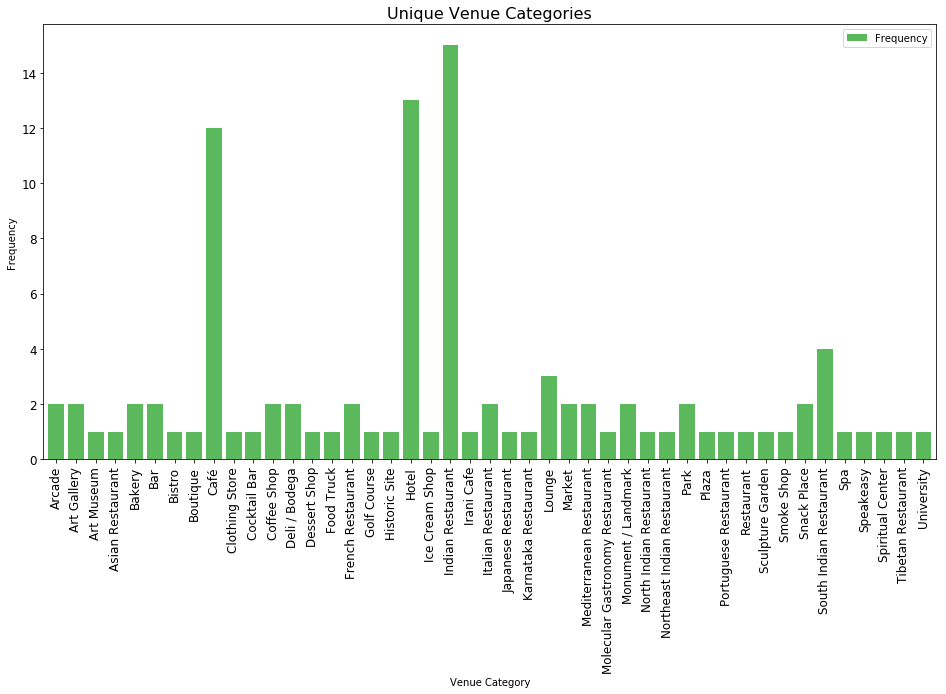

In [43]:
del_list1.plot(kind='bar', figsize=(16, 8),
            fontsize = 12 , width = 0.8,
            color = ['#5cb85c']) 
plt.ylabel('Frequency')
plt.title('Unique Venue Categories', fontsize = 16)
plt.show()

#### Mumbai

In [36]:
mumbai_venues['Venue Category'].unique()

array(['Coffee Shop', 'Cricket Ground', 'Café', 'Ice Cream Shop', 'Hotel',
       'Scenic Lookout', 'Seafood Restaurant', 'Diner',
       'Parsi Restaurant', 'Bakery', 'Art Gallery',
       'Performing Arts Venue', 'Beach', 'Chinese Restaurant', 'Lounge',
       'Indian Restaurant', 'Asian Restaurant', 'Boutique', 'Theater',
       'Dessert Shop', 'History Museum', 'Italian Restaurant',
       'Nightclub', 'New American Restaurant', 'Pub', 'Gift Shop',
       'Pizza Place', 'Gym / Fitness Center', 'Monument / Landmark',
       'Cocktail Bar', 'Bar', 'Middle Eastern Restaurant',
       'Japanese Restaurant', 'Breakfast Spot', 'Thai Restaurant',
       'Brewery', 'Club House', 'Shopping Mall', 'Sandwich Place',
       'Restaurant', 'Vegetarian / Vegan Restaurant', 'Playground',
       'Gaming Cafe', 'Fast Food Restaurant', 'Garden', 'Historic Site',
       'Park', 'Deli / Bodega', 'Salad Place', 'Gym Pool',
       'French Restaurant', 'Snack Place', 'Farmers Market',
       'Punjabi Rest

In [37]:
print('There are {} uniques categories.'.format(len(mumbai_venues['Venue Category'].unique())))

There are 56 uniques categories.


In [38]:
uni_cat_mum = mumbai_venues['Venue Category'].unique().tolist()
uni_cat_mum.sort()
uni_cat_mum

['Art Gallery',
 'Asian Restaurant',
 'Bagel Shop',
 'Bakery',
 'Bar',
 'Beach',
 'Boutique',
 'Breakfast Spot',
 'Brewery',
 'Café',
 'Chinese Restaurant',
 'Club House',
 'Cocktail Bar',
 'Coffee Shop',
 'Cricket Ground',
 'Deli / Bodega',
 'Dessert Shop',
 'Diner',
 'Farmers Market',
 'Fast Food Restaurant',
 'French Restaurant',
 'Gaming Cafe',
 'Garden',
 'Gift Shop',
 'Gym / Fitness Center',
 'Gym Pool',
 'Historic Site',
 'History Museum',
 'Hotel',
 'Ice Cream Shop',
 'Indian Restaurant',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Lounge',
 'Middle Eastern Restaurant',
 'Monument / Landmark',
 'New American Restaurant',
 'Nightclub',
 'Park',
 'Parsi Restaurant',
 'Performing Arts Venue',
 'Pizza Place',
 'Playground',
 'Pub',
 'Punjabi Restaurant',
 'Restaurant',
 'Salad Place',
 'Sandwich Place',
 'Scenic Lookout',
 'Seafood Restaurant',
 'Shopping Mall',
 'Snack Place',
 'Spa',
 'Thai Restaurant',
 'Theater',
 'Vegetarian / Vegan Restaurant']

In [39]:
freq_cat_mum =mumbai_venues.groupby(['Venue Category']).count()['Venue'].tolist()
freq_cat_mum 

[1,
 1,
 1,
 3,
 2,
 2,
 1,
 1,
 1,
 7,
 2,
 1,
 1,
 2,
 2,
 2,
 4,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 2,
 11,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 6,
 2,
 1,
 1,
 1,
 1,
 1,
 2]

In [40]:
mum_city = []
for i in range(len(uni_cat_mum)):
    mum_city.append("Mumbai")
mum_city    

['Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai']

In [41]:
mum_list = pd.DataFrame([mum_city, uni_cat_mum, freq_cat_mum])
mum_list = mum_list.transpose()
mum_list.columns = ['City', 'Venue Category', 'Frequency']
mum_list.head()

,City,Venue Category,Frequency
0,Mumbai,Art Gallery,1
1,Mumbai,Asian Restaurant,1
2,Mumbai,Bagel Shop,1
3,Mumbai,Bakery,3
4,Mumbai,Bar,2


In [42]:
mum_list1 = mum_list
mum_list1.set_index('Venue Category', inplace = True)
mum_list1.head()

,City,Frequency
Venue Category,,
Art Gallery,Mumbai,1
Asian Restaurant,Mumbai,1
Bagel Shop,Mumbai,1
Bakery,Mumbai,3
Bar,Mumbai,2


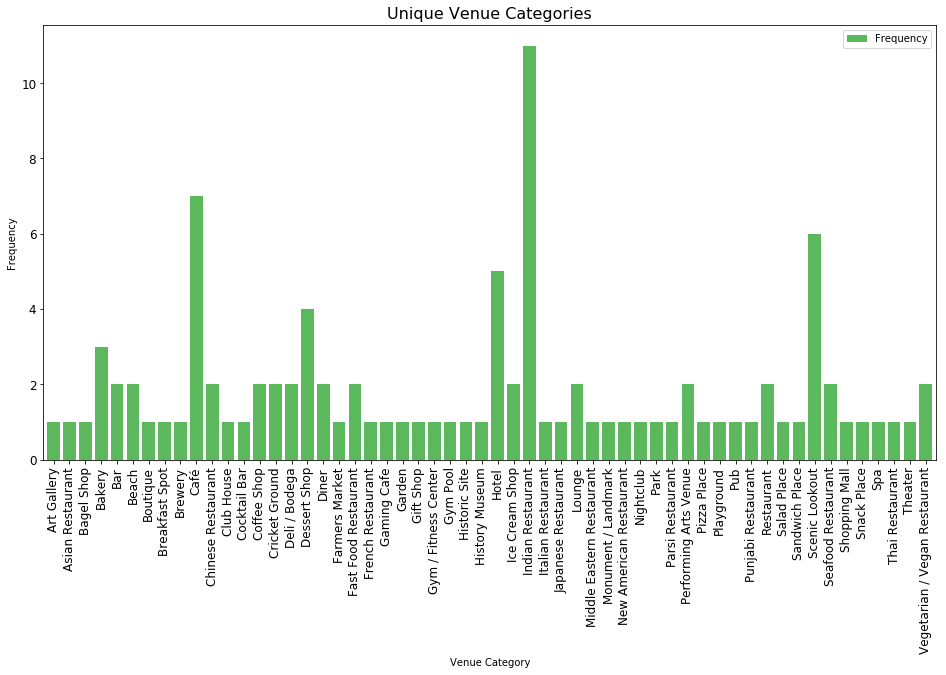

In [44]:
mum_list1.plot(kind='bar', figsize=(16, 8),
            fontsize = 12 , width = 0.8,
            color = ['#5cb85c']) 
plt.ylabel('Frequency')
plt.title('Unique Venue Categories', fontsize = 16)
plt.show()

Now let's balance the dataframes of the unique categories for both the cities.

For New Delhi -

In [45]:
print('Before : {}'.format(len(uni_cat_del)))
for i in uni_cat_mum:
    if i not in uni_cat_del:
        uni_cat_del.append(i)
        freq_cat_del.append(0)
        del_city.append(' New Delhi')
print('After : {}'.format(len(uni_cat_del)))

Before : 45
After : 78


For Mumbai -

In [46]:
print('Before: {}'.format(len(uni_cat_mum)))
for i in uni_cat_del:
    if i not in uni_cat_mum:
        uni_cat_mum.append(i)
        freq_cat_mum.append(0)
        mum_city.append('Mumbai')
print('After: {}'.format(len(uni_cat_mum)))

Before: 56
After: 78


Now let's create the final dataframes for both the cities.

In [56]:
del_flist = pd.DataFrame([del_city, uni_cat_del, freq_cat_del])
del_flist = del_flist.transpose()
del_flist.columns = ['City', 'Venue Category', 'Frequency']
del_flist = del_flist.sort_values(by = 'Frequency', ascending = False)
del_flist = del_flist.reset_index(drop = True)
del_flist.head()

,City,Venue Category,Frequency
0,New Delhi,Indian Restaurant,15
1,New Delhi,Hotel,13
2,New Delhi,Café,12
3,New Delhi,South Indian Restaurant,4
4,New Delhi,Lounge,3


In [58]:
mum_flist = pd.DataFrame([mum_city, uni_cat_mum, freq_cat_mum])
mum_flist = mum_flist.transpose()
mum_flist.columns = ['City', 'Venue Category', 'Frequency']
mum_flist = mum_flist.sort_values(by = 'Frequency', ascending = False)
mum_flist = mum_flist.reset_index(drop = True)
mum_flist.head()

,City,Venue Category,Frequency
0,Mumbai,Indian Restaurant,11
1,Mumbai,Café,7
2,Mumbai,Scenic Lookout,6
3,Mumbai,Hotel,5
4,Mumbai,Dessert Shop,4


## Pearson Correlation Coefficient

The formula for finding this coefficient between sets X and Y with N values can be seen in the image below. 


![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/bd1ccc2979b0fd1c1aec96e386f686ae874f9ec0 "Pearson Correlation")

The values given by the formula vary from r = -1 to r = 1, where 1 forms a direct correlation between the two entities (it means a perfect positive correlation) and -1 forms a perfect negative correlation. 

In our case, a 1 means that the two users have similar tastes while a -1 means the opposite.

In [65]:

pcc = 0 # Variable for storing value of pearson correlation coefficient

other_city = mum_flist.sort_values(by = 'Frequency', ascending = False)
current_city = del_flist.sort_values(by = 'Frequency', ascending = False)

#Get the N for the formula
n = 100

#Let create a temperory dataframe for the venues both cities have in common(all rows will be selected because of balancing we did before)
temp_df = current_city[current_city['Venue Category'].isin(other_city['Venue Category'].tolist())]

#And then store them in a temporary buffer variable in a list format to facilitate future calculations
curr_city_freq = temp_df['Frequency'].tolist()
oth_city_freq = other_city['Frequency'].tolist()

#Now let's calculate the pearson correlation between two cities, so called, x and y
Sxx = sum([i**2 for i in curr_city_freq]) - pow(sum(curr_city_freq),2)/float(n)
Syy = sum([i**2 for i in oth_city_freq]) - pow(sum(oth_city_freq),2)/float(n)
Sxy = sum( i*j for i, j in zip(curr_city_freq, oth_city_freq)) - sum(curr_city_freq)*sum(oth_city_freq)/float(n)
    
#If the denominator is different than zero, then divide, else, 0 correlation.
if Sxx != 0 and Syy != 0:
    pcc = Sxy/pow(Sxx*Syy,1/2)
else:
    pcc = 0

print(pcc)

0.9355535183346663


In [69]:
pcc_per = pcc*100

In [71]:
print('The Similarity percentage between cities New Delhi and Mumbai is {:.3}%.'.format(pcc_per))

The Similarity percentage between cities New Delhi and Mumbai is 93.6%.


## Results & Discussion - 

Our analysis shows that new delhi and mumbai have a similarity percentage of 93.6% which is quite high. We used pearson correlation coefficient to determine the similarity between the cities.

Why Pearson Correlation?

Pearson correlation is invariant to scaling, i.e. multiplying all elements by a nonzero constant or adding any constant to all elements. For example, if you have two vectors X and Y,then, pearson(X, Y) == pearson(X, 2 * Y + 3). This is a pretty important property in recommendation systems because for example two users might rate two series of items totally different in terms of absolute rates, but they would be similar users (i.e. with similar ideas) with similar rates in various scales.

The values for pearson correlation coefficient vary from -1 to 1, where 1 forms a direct correlation between the two entities (it means a perfect positive correlation) and -1 forms a perfect negative correlation. In our case, a 1 means that the two users have similar tastes while a -1 means the opposite.

Our analysis gives the value of pearson correlation cofficient as 0.936 which suggest that both the cities i.e. New Delhi and Mumbai are very similar based on the infrastucture of the cities.


## Conclusion -

Purpose of this project was to identify the similarity between the two given cities based on their infrastructure like hotels, cafes, restaurent,parks, etc. This project was a target for those people who are shifting from one city to the other and wanted to know how the other city is as compared to their current city based on infrastructure. This project will be further developed to compare one's home town/city to multiple cities based on many more features not only infrastructure. This will really help a person/family decide which city will be best for them according to the infrastucture, culture, weather, etc of their current/home city.
